# Building, Evaluating and Testing a Classifier using VGG16 Model in Keras  

In this project we will build an image classifier using the VGG16 pre-trained model and evaluate it.

During this project we will use the data set "Concrete Crack Images for Classification".
Here is the short description of data set from "kaggle.com".

"The dataset contains concrete images having cracks. The data is collected from various METU Campus Buildings.
The dataset is divided into two as negative and positive crack images for image classification.
Each class has 20000images with a total of 40000 images with 227 x 227 pixels with RGB channels.
The dataset is generated from 458 high-resolution images (4032x3024 pixel) with the method proposed by Zhang et al (2016).
High-resolution images have variance in terms of surface finish and illumination conditions.
No data augmentation in terms of random rotation or flipping is applied." (https://www.kaggle.com/datasets/arnavr10880/concrete-crack-images-for-classification)


Visit the [Kaggle Page](https://www.kaggle.com/datasets/arnavr10880/concrete-crack-images-for-classification) for more info.

<a id="item41"></a>

## Download Data

In [109]:
import os
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [44]:
import zipfile
import os

# Path to your local ZIP file
zip_path = "concrete_data_week4.zip"

# Folder to extract to (will be created if it doesn't exist)
data_path = "data"

# Extract
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(data_path)

print("Files extracted to:", os.path.abspath(data_path))


Files extracted to: C:\Users\Gamer\Downloads\data


In [54]:
data_path=data_path+"/concrete_data_week4"

In [56]:
print('Number of files in data file:', len([name for name in os.listdir(data_path)]))

Number of files in data file: 4


In [58]:
print('Names of files in data file:', ([name for name in os.listdir(data_path)]))

Names of files in data file: ['.DS_Store', 'test', 'train', 'valid']


In [66]:
#C:\Users\Gamer\Downloads\data\concrete_data_week4

train_set= data_path + "/train"
print('Number of files in train sets:', len([name for name in os.listdir(train_set)]))
print('Names of files in tarin file:', ([name for name in os.listdir(train_set)]))


Number of files in train sets: 3
Names of files in tarin file: ['.DS_Store', 'negative', 'positive']


In [68]:
test_set= data_path + "/test"
print('Number of files in test sets:', len([name for name in os.listdir(test_set)]))
print('Names of files in test file:', ([name for name in os.listdir(test_set)]))


Number of files in test sets: 3
Names of files in test file: ['.DS_Store', 'negative', 'positive']


In [72]:
valid_set= data_path + "/valid"
print('Number of files in valid sets:', len([name for name in os.listdir(valid_set)]))
print('Names of files in valid file:', ([name for name in os.listdir(valid_set)]))


Number of files in valid sets: 3
Names of files in valid file: ['.DS_Store', 'negative', 'positive']


After you unzip the data, you fill find the data has already been divided into a train, validation, and test sets.

In [78]:
train_positive_set= data_path + "/train/positive"
test_positive_set= data_path + "/test/positive"
valid_positive_set= data_path + "/valid/positive"

print('Number of positive files in train sets:', len([name for name in os.listdir(train_positive_set)]))
print('Number of positive files in test sets:', len([name for name in os.listdir(test_positive_set)]))
print('Number of positive files in valid sets:', len([name for name in os.listdir(valid_positive_set)]))

Number of positive files in train sets: 15001
Number of positive files in test sets: 250
Number of positive files in valid sets: 4751


In [121]:
train_negative_set= data_path + "/train/negative"
test_negative_set= data_path + "/test/negative"
valid_negative_set= data_path + "/valid/negative"

print('Number of negative files in train sets:', len([name for name in os.listdir(train_negative_set)]))
print('Number of negative files in test sets:', len([name for name in os.listdir(test_negative_set)]))
print('Number of negative files in valid sets:', len([name for name in os.listdir(valid_negative_set)]))

Number of negative files in train sets: 15002
Number of negative files in test sets: 250
Number of negative files in valid sets: 4752


We have seen that there are train, test and valid data sets. All of them include positive and negative examples.   

Lets us show some sample images.

In [111]:
positive_sample=os.listdir(train_positive_set)
len(positive_sample)

15001

In [115]:
positive_sample[1]

'00001.jpg'

In [137]:
print(os.path.exists(train_positive_set))

True


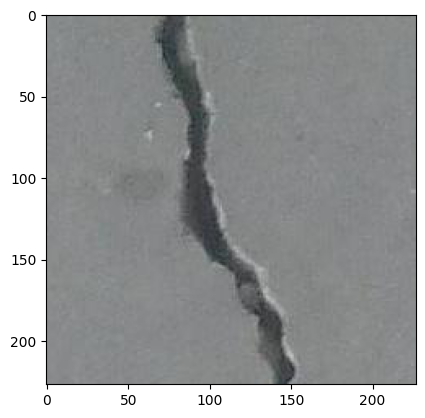

In [171]:

image_data = Image.open(train_positive_set+'/'+positive_sample[1])
plt.imshow(image_data)

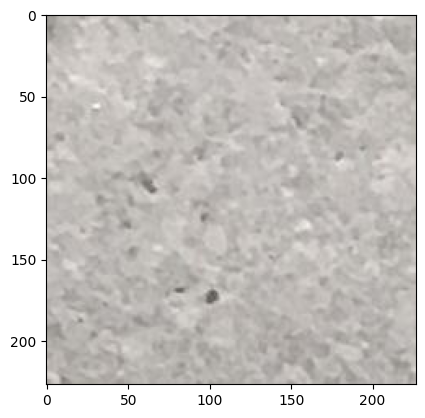

In [182]:
negative_sample=os.listdir(train_negative_set)
image_data=Image.open(train_negative_set+'/'+negative_sample[4])
plt.imshow(image_data)

In [190]:
image_data=np.array(image_data)
image_data.shape

(227, 227, 3)

In [192]:
image_data

array([[[149, 146, 141],
        [149, 146, 141],
        [148, 145, 140],
        ...,
        [189, 185, 182],
        [190, 186, 183],
        [192, 188, 185]],

       [[155, 152, 147],
        [156, 153, 148],
        [157, 154, 149],
        ...,
        [189, 185, 182],
        [189, 185, 182],
        [191, 187, 184]],

       [[155, 152, 147],
        [159, 156, 151],
        [163, 160, 155],
        ...,
        [189, 185, 182],
        [189, 185, 182],
        [190, 186, 183]],

       ...,

       [[166, 161, 157],
        [171, 166, 162],
        [180, 175, 171],
        ...,
        [168, 164, 161],
        [171, 167, 164],
        [174, 170, 167]],

       [[165, 160, 156],
        [169, 164, 160],
        [178, 173, 169],
        ...,
        [176, 172, 169],
        [178, 174, 171],
        [182, 178, 175]],

       [[163, 158, 154],
        [168, 163, 159],
        [176, 171, 167],
        ...,
        [182, 178, 175],
        [184, 180, 177],
        [188, 184, 181]]

<a id="item42"></a>

## Build Classifier using VGG16

Import libraries, modules, and packages that we will need

In [198]:
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [342]:
# instantiate our image data generator
data_generator = ImageDataGenerator(rescale=1./255)

VGG16 was originally trained on 224 × 224 images. So we are defining the target size=(224,224).

Let us choose the batch size equal to 100. 

In [344]:
image_generator_train = data_generator.flow_from_directory(
    train_set,
    batch_size=100,
    target_size=(224,224),
    class_mode='categorical',
    seed=24
    )

Found 9501 images belonging to 2 classes.


In [346]:
image_generator_valid = data_generator.flow_from_directory(
    valid_set,
    batch_size=100,
    target_size=(224,224),
    class_mode='categorical',
    seed=24
    )

Found 9501 images belonging to 2 classes.


Now, as an example we can see first 4 images in the first batch.
"flow_from_directory()" returns a "DirectoryIterator", which is an iterator object. 
So we can use "next(iterator)" to reach out the next batch.

In [348]:
images, labels=next(image_generator_train)


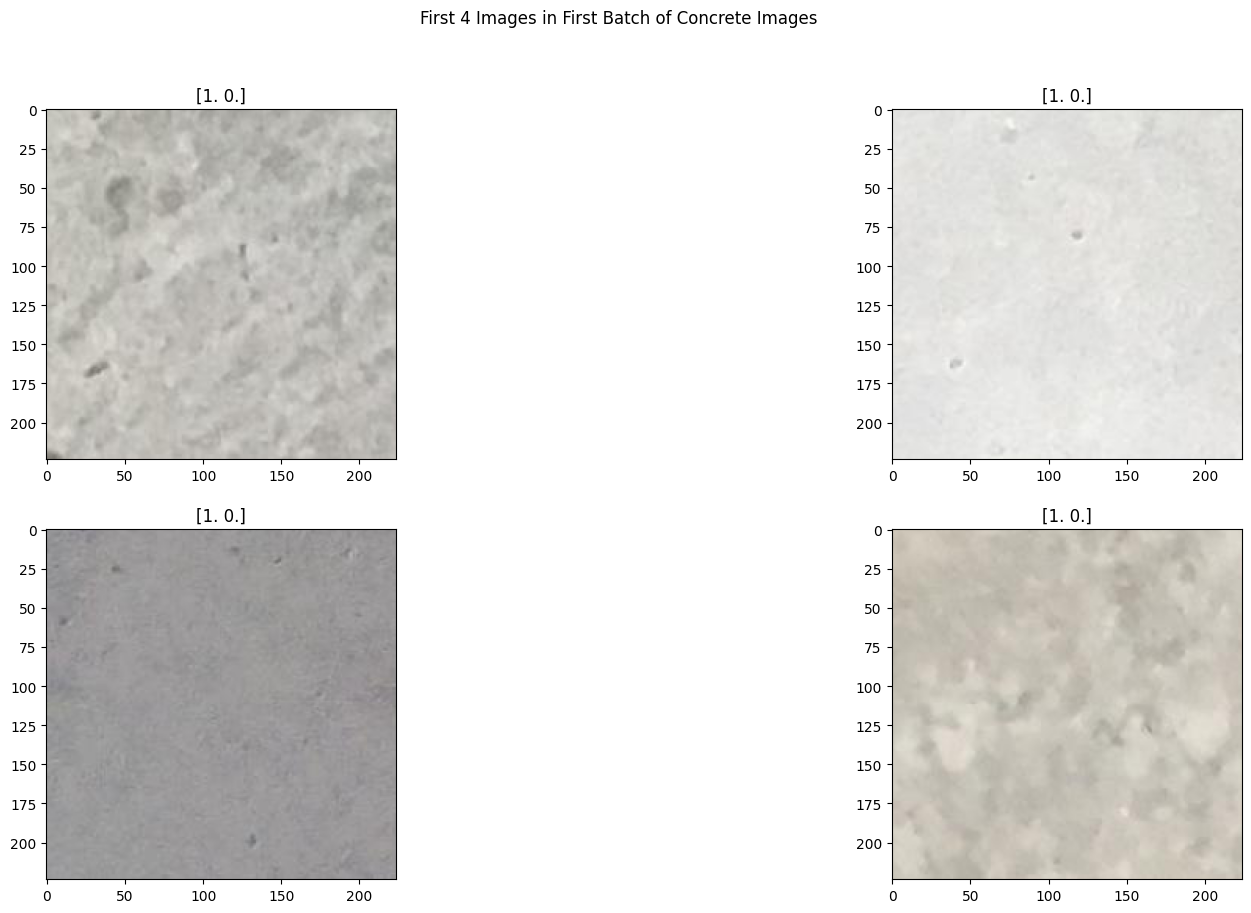

In [469]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10)) # define our figure and axes

index = 0
for ax1 in axs:
    for ax2 in ax1: 
        image_data = np.array(images[index])#.astype(np.uint8)
        ax2.imshow(image_data)
        ax2.set_title(labels[index])
        index += 1

fig.suptitle('First 4 Images in First Batch of Concrete Images') 
plt.show()

Now, we will build an image classifier using the VGG16 pre-trained model. First import the necessary libraries.

In [352]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.applications import VGG16
#from keras.applications.VGG16 import preprocess_input

Create a sequential model using Keras. 

In [354]:
my_model = Sequential()

Add VGG16 model to it and dense layer.

Note that we don't want to include the top layer or the output layer of the VGG16. We actually want to define our own output layer and train it so that it is optimized for our image dataset. In order to leave out the output layer of the pre-trained model, we set the "include_top" to False.

In [356]:
my_model.add(VGG16(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    ))

Now define the output layer as a Dense layer. This should consist two nodes and use the Softmax function as the activation function.


In [358]:
my_model.add(Dense(2, activation='softmax'))

We can see the summary of the model. 

In [360]:
my_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 512)            │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,715,714 (56.14 MB)

 Trainable params: 14,715,714 (56.14 MB)

 Non-trainable params: 0 (0.00 B)

In [362]:
my_model.layers

[<Functional name=vgg16, built=True>, <Dense name=dense_1, built=True>]

In [364]:
my_model.layers[0]

<Functional name=vgg16, built=True>

In [366]:
my_model.layers[1]

<Dense name=dense_1, built=True>

Since the VVG16 model has already been trained, we want to train only our dense output layer. To do that, we run the following code.


<a id="item43"></a>

In [369]:
my_model.layers[0].trainable = False

Now, check the summary of the model one more time.

In [371]:
my_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 512)            │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,715,714 (56.14 MB)

 Trainable params: 1,026 (4.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

As we see all parameters of VGG16 are now non-trainable.

Now compile the our model by using adam optimizer and categorical_crossentropy loss function.

In [373]:
my_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Let us fit the model on the augmented data. In this part we use "fit" method which automatically detects whether we are passing Numpy arrays or a generator/iterator.

In [375]:
try:
    fit_history = my_model.fit(
    image_generator_train,
    steps_per_epoch=len(image_generator_train),
    epochs=2, # let us num of epochs is 2
    validation_data=image_generator_valid,
    validation_steps=len(image_generator_valid),
    verbose=1,
    )

except Exception as e:
    print("Training stopped due to error:", e)

Epoch 1/2
96/96 ━━━━━━━━━━━━━━━━━━━━ 4915s 51s/step - accuracy: 0.7777 - loss: 0.5925 - val_accuracy: 0.9436 - val_loss: 0.3385
Epoch 2/2
96/96 ━━━━━━━━━━━━━━━━━━━━ 4626s 48s/step - accuracy: 0.9528 - loss: 0.3027 - val_accuracy: 0.9596 - val_loss: 0.2271


Usually training takes a long time when building deep learning models. So it is always a good idea to save our model once the training is complete. 

In [376]:
#model.save('concrete_classifier_VGG16_model.h5')
my_model.save('concrete_classifier_VGG16_model.keras')

## Evaluation of Model

First load our model.

In [379]:
from tensorflow.keras.models import load_model

loaded_model = load_model('concrete_classifier_VGG16_model.keras')


In [381]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [383]:
loaded_model.layers

[<Functional name=vgg16, built=True>, <Dense name=dense_1, built=True>]

We need to define ImageDataGenerator for test data.

In [389]:
image_generator_test =data_generator.flow_from_directory(
    test_set,    
    target_size=(224, 224),       
    batch_size=100,              
    class_mode='categorical',    
    shuffle=False                
)


Found 500 images belonging to 2 classes.


Now evaluate the model by using ".evaluate()" method.

In [387]:
results = loaded_model.evaluate(image_generator_test)

# Print results
print("Test Loss:", results[0])
print("Test Accuracy:", results[1])


5/5 ━━━━━━━━━━━━━━━━━━━━ 113s 23s/step - accuracy: 0.9321 - loss: 0.2417
Test Loss: 0.2307615429162979
Test Accuracy: 0.9520000219345093


Here we see that accuracy of our model is 0.95 which is really good for 2 epoch. Because of GPU problem, we cannot do so many epochs. 

<a id="item44"></a>

## Make a Prediction

Lets us make some predictions to see how correctly our model predict the labels.

In [400]:
# Predict class probabilities
predictions = loaded_model.predict(image_generator_test, steps=len(image_generator_test))

predicted_classes = predictions.argmax(axis=1)  


5/5 ━━━━━━━━━━━━━━━━━━━━ 125s 25s/step


In [409]:
list(image_generator_test.class_indices.keys())

['negative', 'positive']

To mapp from class index to class label, we need to run following cell.

In [407]:
class_labels = list(image_generator_test.class_indices.keys())


Let su check first 5 samples.

In [430]:
predicted_classes[0:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [440]:
images, labels=next(image_generator_test)


In [442]:
labels[0:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

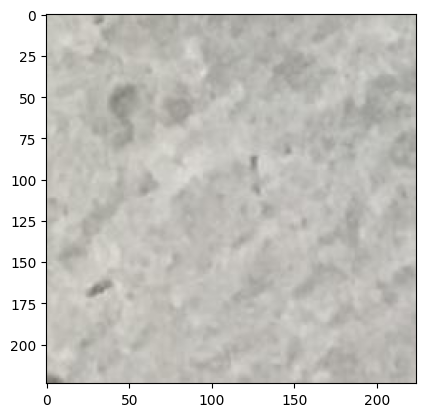

In [472]:
image_data = np.array(images[0])
plt.imshow(image_data)

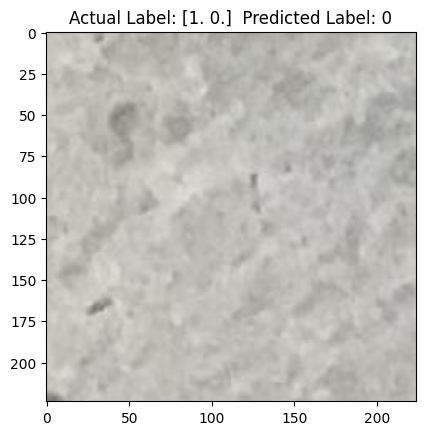

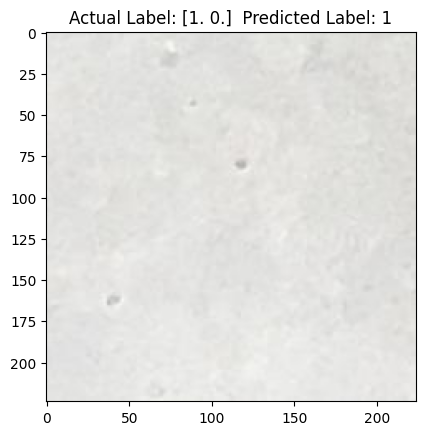

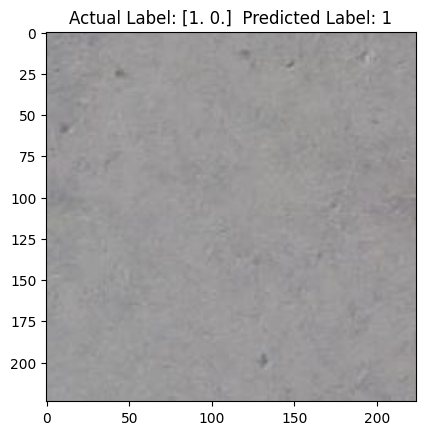

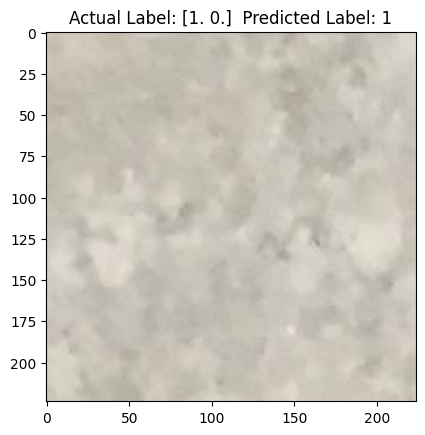

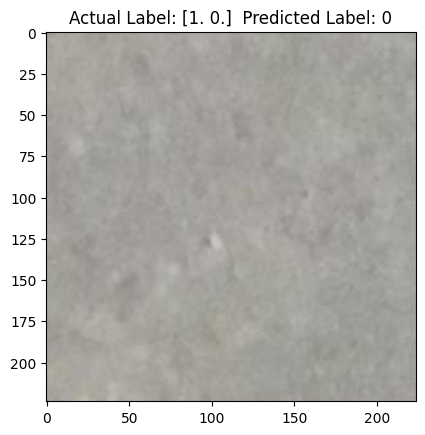

In [466]:
for i in range(5):
    image_data = np.array(images[i])
    actual_label=labels[i]
    predicted_label=predicted_classes[i]
    plt.imshow(image_data)
    plt.title(f'Actual Label: {actual_label}  Predicted Label: {predicted_label}')
    plt.show()
  


As it is shown, first and last images labeled wrongly, the other three image spredicted correctly.